# Mars Express Electric Current Prediction

<h3> Objective: predict the average electric current per hour for 4th Martian Year </h3>

<h3> Training Data </h3>

* Year 1: 2008-08-22 to 2010-07-10
* Year 2: 2010-07-10 to 2012-05-27
* Year 3: 2012-05-27 to 2014-04-14

<h3>Test Data for Prediction </h3>

* Year 4: 2014-04-14 to 2016-03-01

In [1]:
import os
import math
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta

In [2]:
def time_convert(time):
    time_converted = datetime.fromtimestamp(time/1000)
    return time_converted

In [3]:
def convert(data):
    data['ut_ms'] = data['ut_ms'].map(time_convert)
    data.set_index('ut_ms', inplace = True)
    return data

<h3> Features (Context Data) </h3>

* SAAF: Solar Aspect Angles
* DMOP: Detailed Mission Operations Plan
* FTL: Flight dynamics TimeLine with spacecraft pointing events
* EVTF: Other events
* LTDATA: long term data such as the sun-mars distance

<h3> Target Data </h3>

* NPWD****: 33 columns/parameters with the electric current measurements

In [4]:
# Target Variable
'''
y1 = pd.read_csv("train_set/power--2008-08-22_2010-07-10.csv")
y2 = pd.read_csv("train_set/power--2010-07-10_2012-05-27.csv")
y3 = pd.read_csv("train_set/power--2012-05-27_2014-04-14.csv")
y_test = pd.read_csv("test_set/power--2014-01-01_2015-01-01.csv")
target = pd.concat([y1c, y2c, y3c, y_test])
target = convert(target)
target = target.resample("60s").mean().fillna(0).resample("1H").mean()
target.to_csv("target1h.csv")
'''

'\ny1 = pd.read_csv("train_set/power--2008-08-22_2010-07-10.csv")\ny2 = pd.read_csv("train_set/power--2010-07-10_2012-05-27.csv")\ny3 = pd.read_csv("train_set/power--2012-05-27_2014-04-14.csv")\ny_test = pd.read_csv("test_set/power--2014-01-01_2015-01-01.csv")\ntarget = pd.concat([y1c, y2c, y3c, y_test])\ntarget = convert(target)\ntarget = target.resample("60s").mean().fillna(0).resample("1H").mean()\ntarget.to_csv("target1h.csv")\n'

In [5]:
target = pd.read_csv("target1h.csv", index_col='ut_ms')
target.index = pd.to_datetime(target.index)

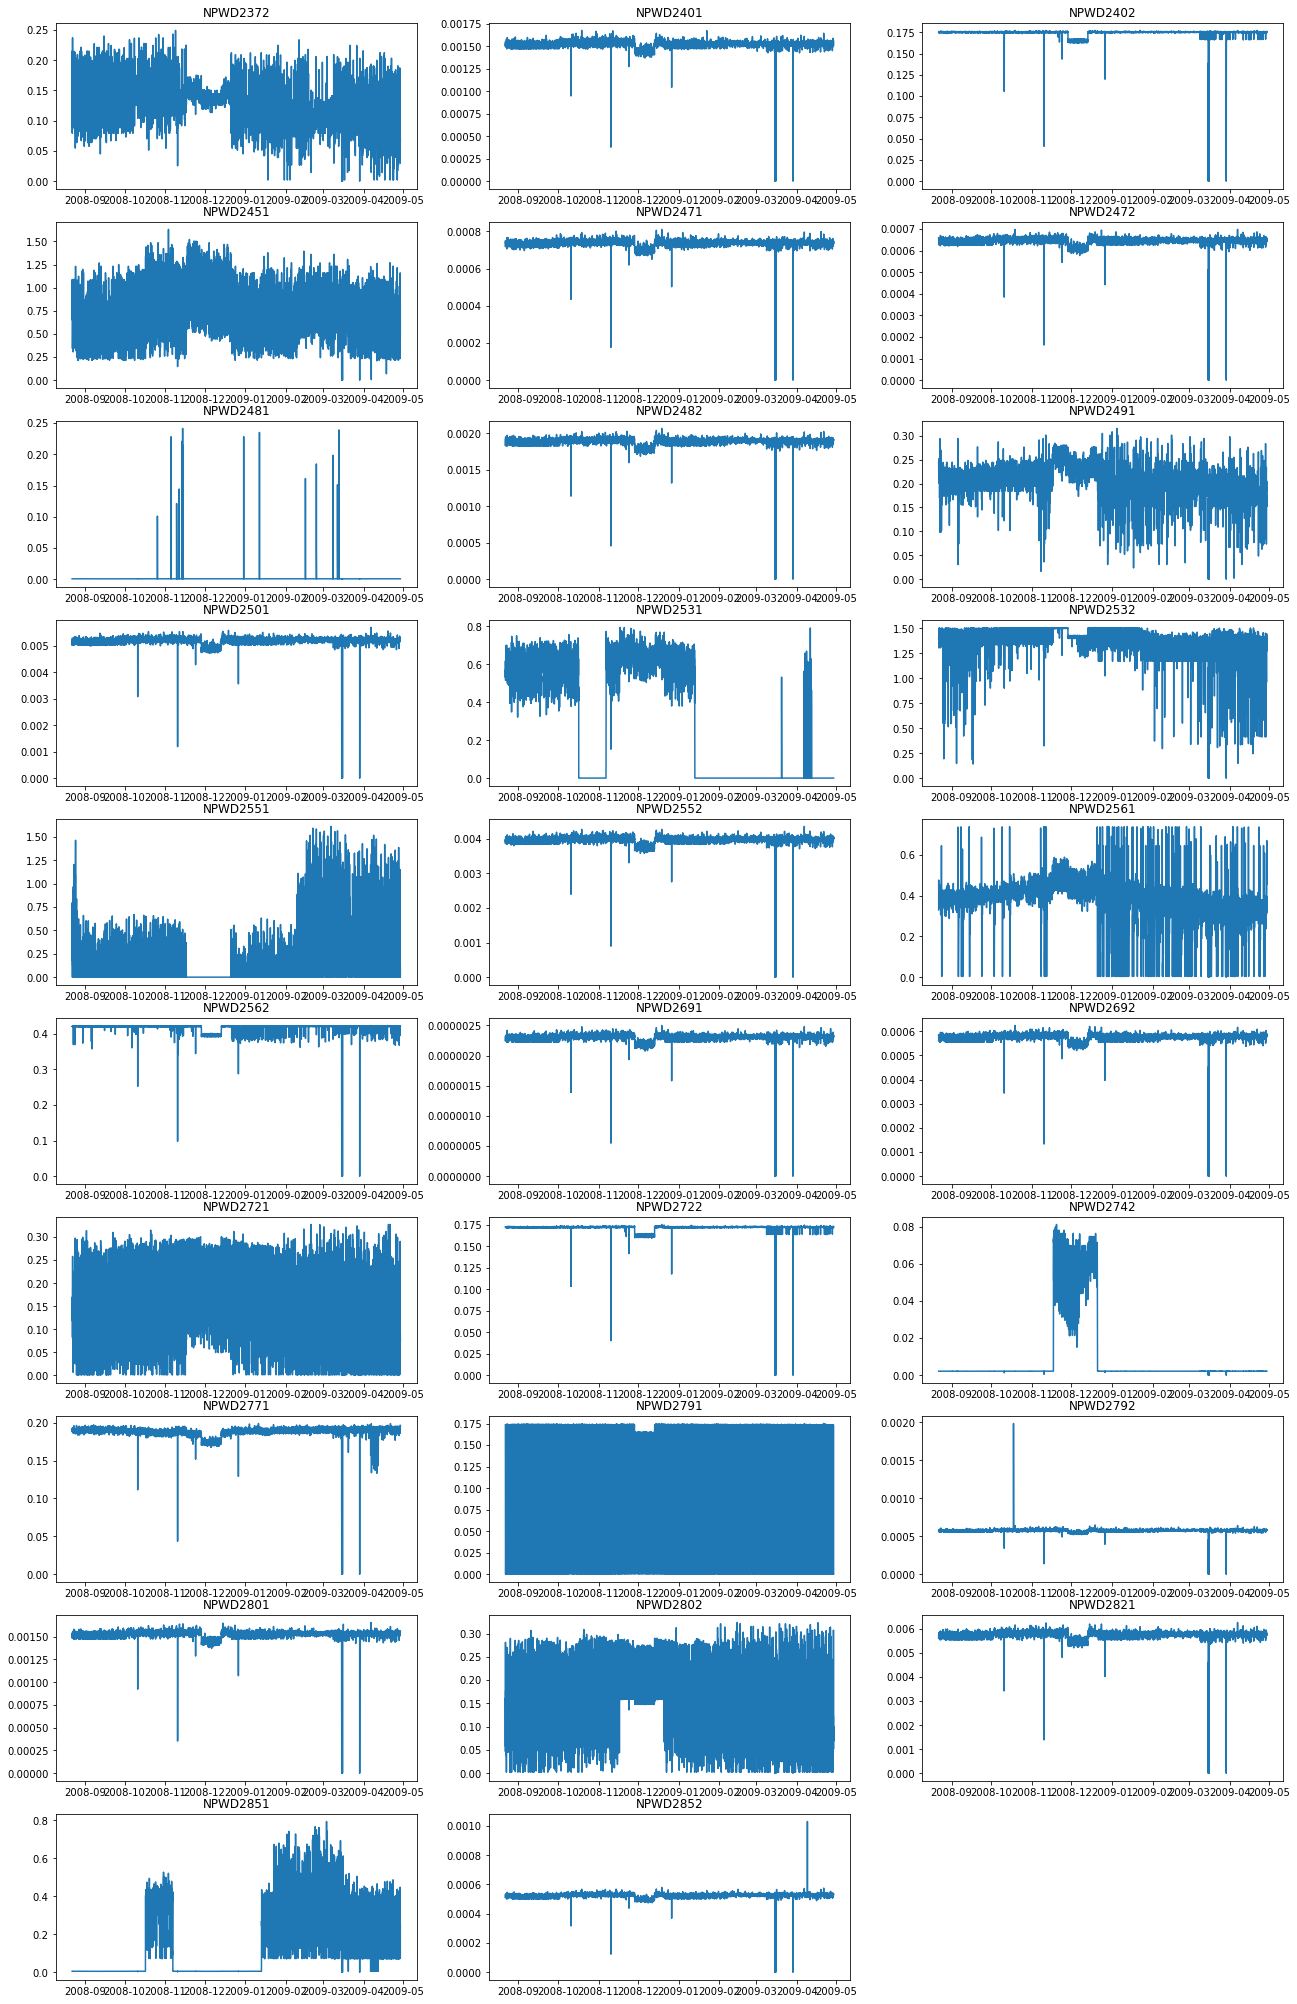

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (22,14))
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(22,36))
for i, j in zip(range(1,30), target.columns):
    ax = fig.add_subplot(10,3,i)
    ax.plot(target[j][:6000])
    ax.set_title(j)

In [7]:
level1 = ["NPWD2401", "NPWD2402", "NPWD2471", "NPWD2472", "NPWD2482", "NPWD2501", "NPWD2552", "NPWD2562", "NPWD2691", "NPWD2692", 
          "NPWD2722", "NPWD2771", "NPWD2801", "NPWD2821", "NPWD2852", "NPWD2871", "NPWD2872", "NPWD2882", "NPWD2792"]
level2 = ["NPWD2481", "NPWD2742", "NPWD2372", "NPWD2491", "NPWD2802", "NPWD2721", "NPWD2791"]
level3 = ["NPWD2531", "NPWD2561", "NPWD2851", "NPWD2881"]
level4 = ["NPWD2451", "NPWD2551", "NPWD2532"]

# SAAF

* sa: solar aspect angle, angle of Mars Express solar panels' normal
* sx: solar angle of the X axis of satellite
* sy: solar angle of the Y axis of satellite
* sz: solar angle of the Z axis of satellite
* Raw Data

In [8]:
#The solar aspect angle is defined as the angle between the pointing direction (the -X axis) and the vector to the Sun.
#Given the condition that the Z axis MUST lie within a 20 degree cone around the Sun, 
#this restricts the allowed solar aspect angle range to lie between 70 and 110 degrees.

In [9]:
'''
saaf1 = pd.read_csv("train_set/context--2008-08-22_2010-07-10--saaf.csv")
saaf2 = pd.read_csv("train_set/context--2010-07-10_2012-05-27--saaf.csv")
saaf3 = pd.read_csv("train_set/context--2012-05-27_2014-04-14--saaf.csv")
saaf_test = pd.read_csv("test_set/context--2014-04-14_2016-03-01--saaf.csv")
saaf = pd.concat([saaf1c, saaf2c, saaf3c, saaf_test])
saaf = convert(saaf)
saaf.to_csv("saaf.csv")
'''

'\nsaaf1 = pd.read_csv("train_set/context--2008-08-22_2010-07-10--saaf.csv")\nsaaf2 = pd.read_csv("train_set/context--2010-07-10_2012-05-27--saaf.csv")\nsaaf3 = pd.read_csv("train_set/context--2012-05-27_2014-04-14--saaf.csv")\nsaaf_test = pd.read_csv("test_set/context--2014-04-14_2016-03-01--saaf.csv")\nsaaf = pd.concat([saaf1c, saaf2c, saaf3c, saaf_test])\nsaaf = convert(saaf)\nsaaf.to_csv("saaf.csv")\n'

In [10]:
saaf = pd.read_csv("saaf.csv", index_col = 'ut_ms')
saaf.index = pd.to_datetime(saaf.index)
saaf = saaf.resample("60s").mean().fillna(0).resample("1H").mean()

In [11]:
# Features did not work: Sola conjunction indicator

In [12]:
saaf.head()

,sa,sx,sy,sz
ut_ms,,,,
2008-08-22 02:00:00,0.339667,14.551083,90.339667,104.548833
2008-08-22 03:00:00,3.268986,16.023556,90.431056,97.917569
2008-08-22 04:00:00,29.370963,36.582788,66.677538,91.204570
2008-08-22 05:00:00,1.013333,14.917278,90.129889,104.904639
2008-08-22 06:00:00,0.339833,14.523750,90.339833,104.520250


In [13]:
'''
saaf_new = pd.DataFrame(index = saaf.index)
saaf_new['conjunction'] = 0
saaf_new.loc['2008-11-16':'2008-12-20','conjunction']=1
saaf_new.loc['2011-01-17':'2011-02-20','conjunction']=1
saaf_new.loc['2013-03-28':'2013-05-05','conjunction']=1
saaf_new.loc['2015-05-27':'2015-07-01','conjunction']=1
'''

"\nsaaf_new = pd.DataFrame(index = saaf.index)\nsaaf_new['conjunction'] = 0\nsaaf_new.loc['2008-11-16':'2008-12-20','conjunction']=1\nsaaf_new.loc['2011-01-17':'2011-02-20','conjunction']=1\nsaaf_new.loc['2013-03-28':'2013-05-05','conjunction']=1\nsaaf_new.loc['2015-05-27':'2015-07-01','conjunction']=1\n"

# SAAF + ltdata (RF RMSE: 0.104620822505865)

<h3> ltdata </h3>

* Raw Data
* Previous Hour Data (-1)
* Rolling mean for last 6 hours
* Rolling mean for last 24 hours

In [14]:
ltdata1 = pd.read_csv("train_set/context--2008-08-22_2010-07-10--ltdata.csv")
ltdata2 = pd.read_csv("train_set/context--2010-07-10_2012-05-27--ltdata.csv")
ltdata3 = pd.read_csv("train_set/context--2012-05-27_2014-04-14--ltdata.csv")
ltdata_test = pd.read_csv("test_set/context--2014-04-14_2016-03-01--ltdata.csv")
ltdata = pd.concat([ltdata1, ltdata2, ltdata3, ltdata_test])
ltdata = convert(ltdata)

In [15]:
#Method : Linear 
ltdata = ltdata.resample("1H").ffill().interpolate(method = 'linear', limit_direction = 'both')

In [16]:
#Longterm Data Change + lagged variable
lt_diff = ltdata.diff(24).fillna(method='bfill')
lt_lag = ltdata.shift(7).fillna(method='bfill')

In [17]:
evtf1 = pd.read_csv("train_set/context--2008-08-22_2010-07-10--evtf.csv")
evtf2 = pd.read_csv("train_set/context--2010-07-10_2012-05-27--evtf.csv")
evtf3 = pd.read_csv("train_set/context--2012-05-27_2014-04-14--evtf.csv")
evtf_test = pd.read_csv("test_set/context--2014-04-14_2016-03-01--evtf.csv")
evtf = pd.concat([evtf1, evtf2, evtf3, evtf_test])
evtf = convert(evtf)

In [18]:
#Penumbra Time
penumbra_start = evtf[evtf['description'].str.contains('MAR_PENUMBRA_START') == True].index
penumbra_end = evtf[evtf['description'].str.contains('MAR_PENUMBRA_END') == True].index
penumbra = pd.DataFrame(penumbra_end, penumbra_start)
penumbra_time = penumbra.loc[:,'ut_ms'] - penumbra.index
penumbra['penumbra_time'] = penumbra_time.dt.total_seconds()
penumbra['state'] = 0 
for i, j in zip(penumbra_start, penumbra_end):
    penumbra.loc[i:j, 'state'] = 1
penumbra = penumbra.resample("1H").sum()

In [19]:
#Umbra Time
umbra_start = evtf[evtf['description'].str.contains('MAR_UMBRA_START') == True].index
umbra_end = evtf[evtf['description'].str.contains('MAR_UMBRA_END') == True].index
umbra = pd.DataFrame(umbra_end, umbra_start)
umbra_time = umbra.loc[:,'ut_ms'] - umbra.index
umbra['umbra_time'] = umbra_time.dt.total_seconds()
umbra['state'] = 0
for i,j in zip(umbra_start, umbra_end):
    umbra.loc[i:j, 'state'] = 1
umbra = umbra.resample("1H").sum()

In [20]:
#Pericentre Time
peri_start = evtf[evtf['description'].str.contains('PERICENTRE_PASSAGE') == True].index
pericentre = evtf[evtf['description'].str.contains('PERICENTRE_PASSAGE') == True].index
peri_time = []
j = 0
for i in evtf.loc[pericentre]['description'].str.split('_'):
    if "PASSAGE" in i:
        j +=1
        peri_time.append(j)
peri_time = pd.DataFrame(peri_time, pericentre)

In [21]:
peri_time = peri_time.resample("1H").mean().fillna(0)

In [22]:
#S(x, y, z) cos features
sx_cos = (np.maximum(np.cos(saaf['sx']), 0) * ltdata['solarconstantmars'] * umbra['state'] * penumbra['state'] * 0.5).fillna(0)
sy_cos = (np.maximum(np.cos(saaf['sy']), 0) * ltdata['solarconstantmars'] * umbra['state'] * penumbra['state'] * 0.5).fillna(0)
sz_cos = (np.maximum(np.cos(saaf['sz']), 0) * ltdata['solarconstantmars'] * umbra['state'] * penumbra['state'] * 0.5).fillna(0)
#S(x, y, z) cos features rolling sum
sx_rs = sx_cos.rolling(7).sum().fillna(0)
sy_rs = sy_cos.rolling(7).sum().fillna(0)
sz_rs = sz_cos.rolling(7).sum().fillna(0)
saaf_new = pd.concat([sx_cos, sy_cos, sz_cos, sx_rs, sy_rs, sz_rs], axis = 1)

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.concat([saaf_new, ltdata, lt_diff, lt_lag], axis = 1).interpolate(method = 'linear', limit_direction = 'both')
x_train = scaler.fit_transform(x.loc[:'2014-04-14 02:00:00'])
x_test = scaler.fit_transform(x.loc['2014-04-14 02:00:00':])
y_train = target.loc[:'2014-04-14 02:00:00']
y_test = target.loc['2014-04-14 02:00:00':]
rf = RandomForestRegressor(random_state = 2019, n_jobs = -1)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred[:len(y_test)])
rmse = math.sqrt(mse)
rmse

0.10462082250586502

# SAAF + ltdata + ftl (RF RMSE: 0.10452572251031048)

<h3> ftl </h3>

* One hot encoding of flagcomms and type
* (Works better than Label encoding and binary encoding)
* Time Indicators(Second) for each type do not work better than one hot encoding

In [25]:
ftl1 = pd.read_csv("train_set/context--2008-08-22_2010-07-10--ftl.csv")
ftl2 = pd.read_csv("train_set/context--2010-07-10_2012-05-27--ftl.csv")
ftl3 = pd.read_csv("train_set/context--2012-05-27_2014-04-14--ftl.csv")
ftl_test = pd.read_csv("test_set/context--2014-04-14_2016-03-01--ftl.csv")
ftl = pd.concat([ftl1, ftl2, ftl3, ftl_test])
ftl.columns = ['ut_ms','ute_ms', 'type', 'flagcomms']
ftl_type = pd.concat([pd.get_dummies(ftl['type']), pd.get_dummies(ftl['flagcomms'])], axis =1 )
ftl_type['ut_ms'] = ftl['ut_ms']
ftl_type = convert(ftl_type)
#type_time = (ftl['ute_ms'] - ftl['ut_ms'])/1000
#ftl.drop('ut_ms', axis = 1, inplace = True)

In [26]:
#for i, j in zip(ftl_type.index, type_time):
#    ftl_type.loc[i] = ftl_type.loc[i] * j

In [27]:
ftl = ftl_type.resample("1H").sum()

In [28]:
x = pd.concat([saaf_new, ltdata, lt_diff, lt_lag, ftl], axis = 1).interpolate(method = 'linear', limit_direction = 'both')
x_train = scaler.fit_transform(x.loc[:'2014-04-14 02:00:00'])
x_test = scaler.fit_transform(x.loc['2014-04-14 02:00:00':])
y_train = target.loc[:'2014-04-14 02:00:00']
y_test = target.loc['2014-04-14 02:00:00':]
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred[:len(y_test)])
rmse = math.sqrt(mse)
rmse

0.10452572251031048

# SAAF + ltdata + ftl + DMOP (RF RMSE: 0.09981384691379465 )

<h3> DMOP (Commands)</h3>

* One hot encoding for each subsystem and their avearge for 1 hour (average works better than count)
* AAAAF / APSF / AVVV / AMMMF / ASSSF / ATTT / AACFE / AXXX / AHHHF / AACF / AOOO / Others
* Toggle(Estimated to be) Pairs
* Binary Indicator start with MOC and PENE
* Height Vector

In [29]:
dmop1 = pd.read_csv("train_set/context--2008-08-22_2010-07-10--dmop.csv")
dmop2 = pd.read_csv("train_set/context--2010-07-10_2012-05-27--dmop.csv")
dmop3 = pd.read_csv("train_set/context--2012-05-27_2014-04-14--dmop.csv")
dmop_test = pd.read_csv("test_set/context--2014-04-14_2016-03-01--dmop.csv")
dmop = pd.concat([dmop1, dmop2, dmop3, dmop_test])
dmop = convert(dmop)

In [30]:
pairs = [['AAAAF40B0','AAAAF40C0'],
        ['AAAAF40E0','AAAAF40F0'],
        ['AAAAF40D0','AAAAF40P0'],
        ['ASSSF01P0', 'ASSSF06P0'],
        ['AACFM01A','AACFM02A'],
        ['AACF325C','AACF325D'],
        ['AMMMF52D3','AMMMF52D4'],
        ['AMMMF18A0','AMMMF40A0'],
        ['AHHHF01P1','AHHHF50A2'],
        ['ATTTF030A', 'ATTTF030B'],
        ['ATTTF321P','ATTTF321R'],
        ['AACFM01A','AACFM02A']]

In [31]:
for idx,i in enumerate(pairs):
    print (idx,i,(dmop['subsystem']==i[0]).sum(),(dmop['subsystem']==i[1]).sum())

0 ['AAAAF40B0', 'AAAAF40C0'] 3018 3006
1 ['AAAAF40E0', 'AAAAF40F0'] 2304 2305
2 ['AAAAF40D0', 'AAAAF40P0'] 1676 946
3 ['ASSSF01P0', 'ASSSF06P0'] 4344 4339
4 ['AACFM01A', 'AACFM02A'] 7353 7342
5 ['AACF325C', 'AACF325D'] 214 214
6 ['AMMMF52D3', 'AMMMF52D4'] 1675 1675
7 ['AMMMF18A0', 'AMMMF40A0'] 6783 3986
8 ['AHHHF01P1', 'AHHHF50A2'] 1219 2256
9 ['ATTTF030A', 'ATTTF030B'] 6807 6668
10 ['ATTTF321P', 'ATTTF321R'] 1252 1250
11 ['AACFM01A', 'AACFM02A'] 7353 7342


In [32]:
p = []
on_off = pd.DataFrame()
for idx,i in enumerate(pairs):
    p.append(dmop['subsystem'].apply(lambda x: 1 if i[1] in x.split(".")[0] \
                                     else (0 if i[0] in x.split(".")[0] else np.nan)))

    on_off = pd.concat(p, axis=1).fillna(method='ffill').fillna(0)
    on_off.columns=['pair_c_%d'%z for z in range(len(on_off.columns))]

In [33]:
on_off = on_off.resample("1H").sum()

In [34]:
#Binary Indicators for Commands start with PENE
pene = dmop[dmop['subsystem'].str.startswith("PENE")]
pene['subsystem'] = 1
pene = pene.resample("1H").sum().interpolate(method='nearest')

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [35]:
#Binary Indicators for Commands start with MOC
moc = dmop[dmop['subsystem'].str.startswith("MOC")]
moc['subsystem'] = 1
moc = moc.resample("1H").sum().interpolate(method='nearest')

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [36]:
# Height Vectors
def height_vector():
    heights1=evtf['description'].str.extract(r'^(\d+)_KM', expand=False).fillna(0).astype(int).copy()
    heights2=evtf['description'].str.contains('APOCENTRE').map(lambda x: 10107 if x else 0).astype(int).copy()
    heights3=evtf['description'].str.contains('PERICENTRE').map(lambda x: 298 if x else 0).astype(int).copy()
    heights=heights1+heights2+heights3
    u=heights[heights>0]
    u=u.resample('60s').mean().interpolate().resample('1H').mean()/10000.0
    u=u.to_frame('evtf_height')
    return u
height = height_vector()

In [37]:
x = pd.concat([saaf_new, ltdata, ftl, on_off, height, umbra['umbra_time'], penumbra['penumbra_time'], moc, pene], axis = 1).interpolate(method = 'linear', limit_direction = 'both')
x_train = scaler.fit_transform(x.loc[:'2014-04-14 02:00:00'])
x_test = scaler.fit_transform(x.loc['2014-04-14 02:00:00':])
y_train = target.loc[:'2014-04-14 02:00:00']
y_test = target.loc['2014-04-14 02:00:00':]
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
mse = mean_squared_error(y_test, pred[:len(y_test)])
rmse = math.sqrt(mse)
rmse

0.09981384691379463

# SAAF + ltdata + ftl + DMOP + evtf (RF RMSE: 0.097758623011236)

<h3> evtf </h3>

* One hot encoding for major events and average for 1 hour
* evt_major1 = ['MRB_', 'DESCEND', 'ASCEND', 'MSL_LOS', 'MSL_AOS', 'OCC_MARS_START', 'OCC_MARS_END', 'MAR_PENUMBRA_START','MAR_PENUMBRA_END',
              'MAR_UMBRA_START', 'MAR_UMBRA_END', 'NNO_', 'CEB_', 'CAN_', 'GDS_', 'BLK_',
              'KLZ_', 'MAD_', 'MLG_', 'PERICENTRE_PASSAGE_', 'APOCENTRE_PASSAGE_']
* evt_major2 = ['_RANGE', '_RTLT_', '_RA_', '_SSP_']
* evt_major3 = ['_SZA_', '_DE_']
* evt_major4 = ['_OMP']

In [38]:
evtf1 = pd.read_csv("train_set/context--2008-08-22_2010-07-10--evtf.csv")
evtf2 = pd.read_csv("train_set/context--2010-07-10_2012-05-27--evtf.csv")
evtf3 = pd.read_csv("train_set/context--2012-05-27_2014-04-14--evtf.csv")
evtf_test = pd.read_csv("test_set/context--2014-04-14_2016-03-01--evtf.csv")
evtf = pd.concat([evtf1, evtf2, evtf3, evtf_test])
evtf = convert(evtf)

In [39]:
evt_major1 = ['MRB_', 'DESCEND', 'ASCEND', 'MSL_LOS', 'MSL_AOS', 'OCC_MARS_START', 'OCC_MARS_END', 'MAR_PENUMBRA_START','MAR_PENUMBRA_END',
              'MAR_UMBRA_START', 'MAR_UMBRA_END', 'NNO_', 'CEB_', 'CAN_', 'GDS_', 'BLK_',
              'KLZ_', 'MAD_', 'MLG_', 'PERICENTRE_PASSAGE_', 'APOCENTRE_PASSAGE_']
evt_major2 = ['RANGE_06000KM_START', 'RANGE_06000KM_END', '_RTLT_', '_RA_', '_SSP_']
evt_major3 = ['_SZA_', '_DE_']
evt_major4 = ['_OMP']

In [40]:
evt_table = []
for i in evtf.iterrows():
    evt_row = []
    
    try:
        for j, k in zip(evt_major4, range(1, len(evt_major4))):
            evt = i[1][0].find(j)
            if evt != -1:
                evt_row.append(k)
        evt_row[0]
    except:
        evt_row.append(0)

    try: 
        for j, k in zip(evt_major3, range(1, len(evt_major3))):
            evt = i[1][0].find(j)
            if evt != -1:
                evt_row.append(k)
        evt_row[1]
    except:
        evt_row.append(0)
        
    try:
        for j, k in zip(evt_major2, range(1, len(evt_major2))):
            evt = i[1][0].find(j)
            if evt != -1:
                evt_row.append(k)
        evt_row[2]
    except:
        evt_row.append(0)

    try:
        for j, k in zip(evt_major1, range(1, len(evt_major1))):
            evt = i[1][0].find(j)
            if evt != -1:
                evt_row.append(k)
        evt_row[3]
    except:
        evt_row.append(0)

        
    evt_table.append(evt_row)

In [41]:
evtf_e = pd.DataFrame(evt_table, index=evtf.index)

In [42]:
evtf_e.fillna(0, inplace=True)

In [43]:
from sklearn.preprocessing import OneHotEncoder
ohencoder = OneHotEncoder(sparse = False, n_values = len(evt_major4)+1)
evtf_ohe1 = ohencoder.fit_transform(np.array(evtf_e.iloc[:,0]).reshape(-1,1))
ohencoder = OneHotEncoder(sparse = False, n_values = len(evt_major3)+1)
evtf_ohe2 = ohencoder.fit_transform(np.array(evtf_e.iloc[:,1]).reshape(-1,1))
ohencoder = OneHotEncoder(sparse = False, n_values = len(evt_major2)+1)
evtf_ohe3 = ohencoder.fit_transform(np.array(evtf_e.iloc[:,2]).reshape(-1,1))
ohencoder = OneHotEncoder(sparse = False, n_values = len(evt_major1)+1)
evtf_ohe4 = ohencoder.fit_transform(np.array(evtf_e.iloc[:,3:]))

In [44]:
evtf_ohe = pd.concat([pd.DataFrame(evtf_ohe1), pd.DataFrame(evtf_ohe2), pd.DataFrame(evtf_ohe3), pd.DataFrame(evtf_ohe4)], axis = 1)

In [45]:
evtf_ohe.index = evtf_e.index

In [46]:
evtf_e = evtf_ohe.resample("1H").sum()

In [47]:
x = pd.concat([saaf_new, ltdata, ftl, on_off, umbra['umbra_time'], penumbra['penumbra_time'], 
               height, height.diff(1).fillna(method = 'bfill'),
               pene, evtf_e], axis = 1).interpolate(method = 'linear', limit_direction = 'both')
x_train = scaler.fit_transform(x.loc[:'2014-04-14 02:00:00'])
x_test = scaler.fit_transform(x.loc['2014-04-14 02:00:00':])
y_train = target.loc[:'2014-04-14 02:00:00']
y_test = target.loc['2014-04-14 02:00:00':]
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
mse = mean_squared_error(y_test, rf_pred[:len(y_test)])
rmse = math.sqrt(mse)
rmse

0.097758623011236

# RMSE Summary based on features

| Data         | saaf+ltdata |    +ftl   |   +DMOP   |  +Event  | 
|--------------|-------------|-----------|-----------|----------|
|Random Forest |   0.1046    |  0.1045  |  0.09981  | 0.09775 |

# Random Forest Model with Parameter Tuning: RMSE 0.09286

* Training data: 2008-08-22  02:00:00 to 2014-04-14  02:00:00
* Test Data: 2004-04-14  02:00:00 to 2015-01-01  00:00:00
* Raw saaf data excluded for better prediction performance

<h3> RF RMSE with Test Data </h3>

In [48]:
x = pd.concat([saaf_new, ltdata, ftl, on_off, umbra['umbra_time'], penumbra['penumbra_time'], 
               height, height.diff(1).fillna(method = 'bfill'), 
               pene, evtf_e], axis = 1).interpolate(method = 'linear', limit_direction = 'both')
x_train = scaler.fit_transform(x.loc[:'2014-04-14 02:00:00'])
x_test = scaler.fit_transform(x.loc['2014-04-14 02:00:00':])
y_train = target.loc[:'2014-04-14 02:00:00']
y_test = target.loc['2014-04-14 02:00:00':]
rf = RandomForestRegressor(max_depth = 10, n_jobs = 4, random_state = 2019)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
mse = mean_squared_error(y_test, rf_pred[:len(y_test)])
rmse = math.sqrt(mse)
rmse

0.09286876261777621

# Neural Network Models

In [49]:
x = pd.concat([saaf_new, ltdata, ftl, on_off, umbra['umbra_time'], penumbra['penumbra_time'], 
               height, height.diff(1).fillna(method = 'bfill'), 
               pene, evtf_e], axis = 1).interpolate(method = 'linear', limit_direction = 'both')
x_train = scaler.fit_transform(x.loc[:'2014-04-14 02:00:00'])
x_test = scaler.fit_transform(x.loc['2014-04-14 02:00:00':])
y_train = target.loc[:'2014-04-14 02:00:00']
y_test = target.loc['2014-04-14 02:00:00':]

In [50]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM, Embedding, Dropout, Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
import tensorflow as tf 
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


# Sequential RMSE: 0.09709

In [68]:
model = Sequential()
model.add(Dense(256, activation = 'relu', kernel_initializer='normal', input_shape = (len(x.columns),)))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(33, activation = 'linear'))
model.compile(optimizer = 'adam', loss = 'mse')
model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
49465/49465 [==============================] - 5s 107us/step - loss: 0.0113
Epoch 2/10
49465/49465 [==============================] - 5s 92us/step - loss: 0.0081
Epoch 3/10
49465/49465 [==============================] - 4s 75us/step - loss: 0.0077
Epoch 4/10
49465/49465 [==============================] - 4s 85us/step - loss: 0.0074
Epoch 5/10
49465/49465 [==============================] - 4s 84us/step - loss: 0.0072
Epoch 6/10
49465/49465 [==============================] - 4s 89us/step - loss: 0.0070
Epoch 7/10
49465/49465 [==============================] - 4s 87us/step - loss: 0.0068
Epoch 8/10
49465/49465 [==============================] - 5s 98us/step - loss: 0.0067
Epoch 9/10
49465/49465 [==============================] - 5s 92us/step - loss: 0.0066
Epoch 10/10
49465/49465 [==============================] - 4s 89us/step - loss: 0.0065


In [70]:
score = model.evaluate(x_test[:len(y_test)], y_test, verbose=0)
math.sqrt(score)

0.09709039644116035

In [71]:
seq_pred = model.predict(x_test[:len(y_test)])

# LSTM RMSE: 0.093775

In [72]:
model = Sequential()
model.add(LSTM(256, activation = 'relu', return_sequences = True, input_shape = (None, x_train.shape[1]), dropout = 0.3))
model.add(LSTM(256))
model.add(Dense(33, activation = 'linear'))
model.compile(optimizer = 'adam', loss = 'mse', metrics=['accuracy'])

In [73]:
x_lstm = x_train.reshape(x_train.shape[0],1, x_train.shape[1])
model.fit(x_lstm, y_train, epochs=10, batch_size= 64, verbose=1)

Epoch 1/10
49465/49465 [==============================] - 33s 676us/step - loss: 0.0112 - acc: 0.9136
Epoch 2/10
49465/49465 [==============================] - 32s 655us/step - loss: 0.0090 - acc: 0.9151
Epoch 3/10
49465/49465 [==============================] - 35s 703us/step - loss: 0.0086 - acc: 0.9158
Epoch 4/10
49465/49465 [==============================] - 34s 687us/step - loss: 0.0084 - acc: 0.9167
Epoch 5/10
49465/49465 [==============================] - 33s 676us/step - loss: 0.0082 - acc: 0.9162
Epoch 6/10
49465/49465 [==============================] - 35s 698us/step - loss: 0.0080 - acc: 0.9165
Epoch 7/10
49465/49465 [==============================] - 32s 650us/step - loss: 0.0078 - acc: 0.9175
Epoch 8/10
49465/49465 [==============================] - 35s 717us/step - loss: 0.0077 - acc: 0.9171
Epoch 9/10
49465/49465 [==============================] - 38s 760us/step - loss: 0.0076 - acc: 0.9180
Epoch 10/10
49465/49465 [==============================] - 36s 737us/step - loss: 

In [74]:
x_lstm_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])
score = model.evaluate(x_lstm_test[:len(y_test)], y_test, verbose=0)

In [75]:
np.sqrt(score[0])

0.093775908287931156

In [76]:
lstm_pred = model.predict(x_lstm_test[:len(y_test)])

# CNN RMSE: 0.095668481926968876

In [161]:
x_cnn = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
input_shape = (x_train.shape[1], 1)
model = Sequential()
model.add(Conv1D(x_train.shape[1], kernel_size = (10), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling1D(pool_size = (40), strides = 2, padding='valid'))
model.add(Dense(512, activation = 'relu'))
model.add(Flatten())
model.add(Dense(33, activation = 'linear'))
model.compile(optimizer = 'adam', loss = 'mse', metrics=['accuracy'])

In [ ]:
model.fit(x_cnn, y_train, epochs=10, batch_size= 32, verbose=1)

Epoch 1/10
49465/49465 [==============================] - 42s 846us/step - loss: 0.0116 - acc: 0.9135
Epoch 2/10
49465/49465 [==============================] - 38s 777us/step - loss: 0.0096 - acc: 0.9148
Epoch 3/10
49465/49465 [==============================] - 42s 855us/step - loss: 0.0090 - acc: 0.9145
Epoch 4/10
49465/49465 [==============================] - 45s 916us/step - loss: 0.0087 - acc: 0.9145
Epoch 5/10
49465/49465 [==============================] - 39s 785us/step - loss: 0.0086 - acc: 0.9147
Epoch 6/10
48032/49465 [============================>.] - ETA: 1s - loss: 0.0084 - acc: 0.9144

In [160]:
x_cnn_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
score = model.evaluate(x_cnn_test[:len(y_test)], y_test, verbose=0)
np.sqrt(score[0])

0.10543300750440582

In [145]:
cnn_pred = model.predict(x_cnn_test[:len(y_test)])

# Ensemble (RF + Sequential + LSTM + CNN)

<h3> Average Ensemble: 0.090220107436352212 

In [153]:
en = (rf_pred[:len(y_test)] + seq_pred + lstm_pred + cnn_pred)/4
ensembled = mean_squared_error(y_test, en)
np.sqrt(ensembled)

0.090755549770484792

<h3> Weighted Average Ensemble: 0.088897021808498858

In [152]:
en2 = rf_pred[:len(y_test)] * .4 + seq_pred * .2 + lstm_pred *.3 + cnn_pred * .1
ensembled2 = mean_squared_error(y_test, en2)
np.sqrt(ensembled2)

0.090139566912871616

# RMSE Summary

|Model| Random Forest|  Sequential | LSTM      |  CNN      | Average  | Weighted Avg |
|-----|--------------|-------------|-----------|-----------|----------|--------------|
|RMSE |   0.094678   |   0.09529   |  0.093492 |  0.09566  | 0.090220 |       0.08889|